In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IBM2017.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...,...
741,2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
742,2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
743,2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
744,2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


> Data Preprocessing

In [4]:
# Converting Date Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0


In [5]:
# Setting Datetime as Index
dt = df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...
2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


> Model Building

In [6]:
# Splitting the Dataset
data = dt[['Close']]
train_size = int(len(data) * 0.80) # 80% split

train, test = data.iloc[:train_size], data.iloc[train_size:]

> Fitting Model

In [7]:
# Fitting Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters Seasonal Model with additive trend and seasonality
model = ExponentialSmoothing(
    train,
    seasonal='add',
    trend='add',
    seasonal_periods=252
)

fitted_model = model.fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


> Making Predictions

In [8]:
forecast = fitted_model.forecast(len(test))
forecast_df = pd.DataFrame(forecast.values, index=test.index, columns=['Forecast'])

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


> Model Evaluation

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['Close'], forecast_df['Forecast'])
mse = mean_squared_error(test['Close'], forecast_df['Forecast'])

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.22014331915405183
Mean Squared Error: 0.09238042875146805


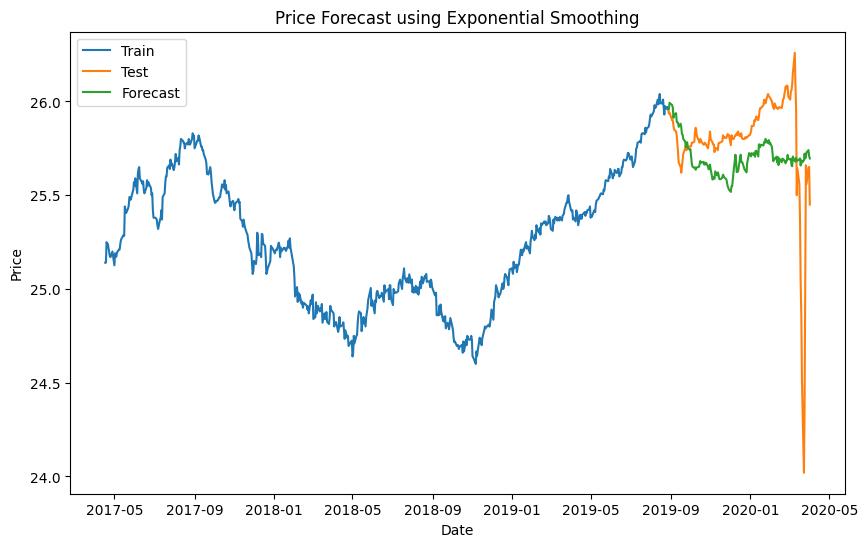

In [10]:
# Plotting the actual data, test and predicted data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df, label='Forecast')
plt.title('Price Forecast using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

> Making Forecast

In [11]:
# Holt-Winters Seasonal Model with additive trend and seasonality
model = ExponentialSmoothing(
    data,
    seasonal='add',
    trend='add',
    seasonal_periods=252
)

fitted_model = model.fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


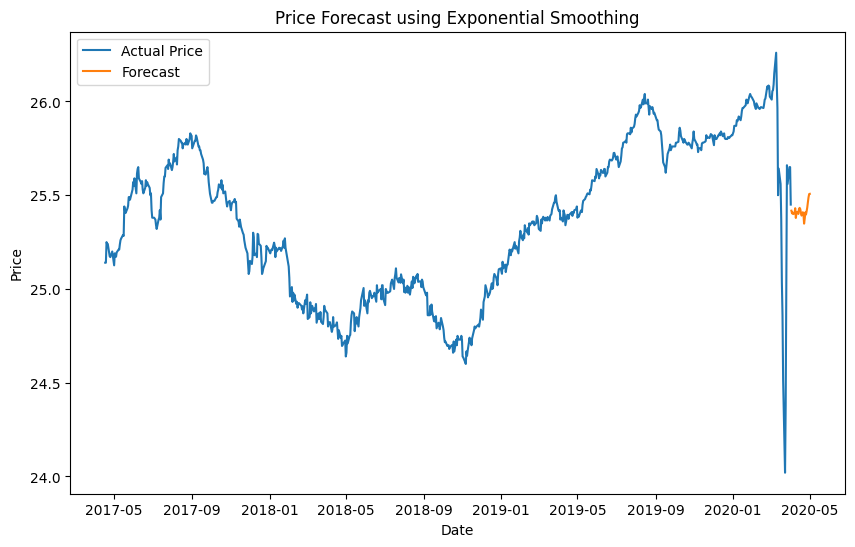

In [12]:
# Making Forecast for 30 days
forecast_steps = 30
forecast = fitted_model.forecast(forecast_steps)

forecast_dates = pd.date_range(
    start = data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)
forecast_df = pd.DataFrame(
    forecast.values,
    index=forecast_dates,
    columns=['Forecast']
)

# Plotting Forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Price')
plt.plot(forecast_df, label='Forecast')
plt.title('Price Forecast using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>